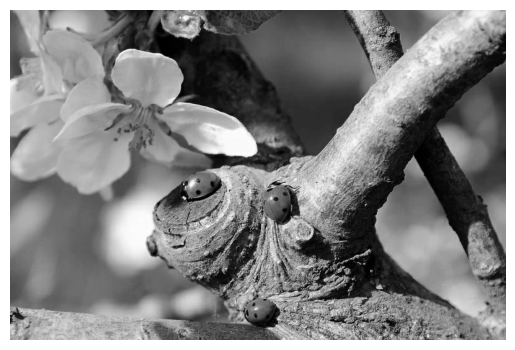

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie obrazu
A = imread('6.webp')
X = np.mean(A,-1) # convert RGB to grayscale

# Pokazanie obrazu
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [5]:
# SVD - zgodnie z instrukcją laboratoryjną (Laboratorium 1)
U, S, VT = np.linalg.svd(X,full_matrices=False)

print("\n---------U---------\n")
print(U)
print("\n---------S---------\n")
print(S)
print("\n---------VT---------\n")
print(VT)


---------U---------

[[ 0.03827056  0.00511923 -0.0681607  ...  0.00092128 -0.03146677
  -0.00479087]
 [ 0.03851838  0.00475479 -0.06961474 ... -0.003659    0.02378435
  -0.04076328]
 [ 0.03884374  0.00465102 -0.07172339 ...  0.00154476 -0.00568541
   0.07167896]
 ...
 [ 0.05110583  0.01388481 -0.00516815 ... -0.00159466  0.01254205
  -0.01705734]
 [ 0.05111351  0.015694   -0.00602961 ...  0.00723665 -0.00358644
  -0.00053993]
 [ 0.0508587   0.0088493  -0.00532903 ...  0.0083397   0.00078224
   0.00917267]]

---------S---------

[7.89030298e+04 1.71820889e+04 1.56964955e+04 1.43865937e+04
 1.16647225e+04 8.04332491e+03 6.63354022e+03 6.03094293e+03
 5.38041268e+03 4.91913259e+03 4.68628093e+03 4.27529212e+03
 3.99871404e+03 3.65209269e+03 3.56374875e+03 3.34836442e+03
 3.26315449e+03 2.91376590e+03 2.72338416e+03 2.67923040e+03
 2.59843823e+03 2.56305428e+03 2.42264547e+03 2.36745043e+03
 2.24328294e+03 2.20528682e+03 2.17341909e+03 2.12640952e+03
 2.04136592e+03 1.98718447e+03 1.9685


---------X^T X---------

[[ 9957525.44444445  9949192.          9968678.44444445 ...
   5861274.22222222  5836128.66666667  5743130.11111111]
 [ 9949192.          9975491.22222222  9999360.22222222 ...
   5886091.77777778  5861496.88888889  5767974.88888889]
 [ 9968678.44444445  9999360.22222222 10051039.44444445 ...
   5934464.66666667  5910389.88888889  5819107.        ]
 ...
 [ 5861274.22222222  5886091.77777778  5934464.66666667 ...
   5479527.44444444  5424996.44444444  5316523.88888889]
 [ 5836128.66666667  5861496.88888889  5910389.88888889 ...
   5424996.44444444  5423806.33333333  5310786.44444444]
 [ 5743130.11111111  5767974.88888889  5819107.         ...
   5316523.88888889  5310786.44444444  5256277.11111111]]

---------X^T X v2---------

[[ 9957525.44444415  9949191.99999988  9968678.44444429 ...
   5861274.22222209  5836128.66666654  5743130.11111099]
 [ 9949191.99999988  9975491.22222229  9999360.22222225 ...
   5886091.77777779  5861496.8888889   5767974.8888889 ]
 [ 

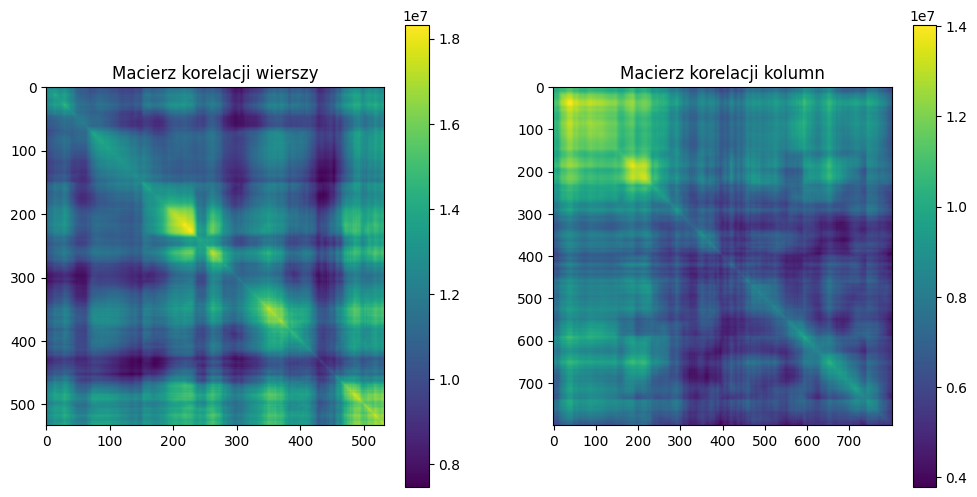

In [6]:
from numpy import diag

# Macierze korelacji

# X^T X
column_corr = X.T@X
column_corr2 = VT.T@diag(S)@diag(S)@VT

print("\n---------X^T X---------\n")
print(column_corr)
print("\n---------X^T X v2---------\n")
print(column_corr2)

# X X^T
row_corr = X.dot(X.T)
row_corr2 = U@diag(S)@diag(S)@U.T

print("\n---------X X^T---------\n")
print(row_corr)
print("\n---------X X^T v2---------\n")
print(row_corr2)

# Sprawdźmy, czy uzyskaliśmy to samo w obu przypadkach
print("\n\n")
print("Czy w przypadku kolumn mamy to samo: " + str(np.allclose(column_corr, column_corr2)))
print("Czy w przypadku wierszy mamy to samo: " + str(np.allclose(row_corr, row_corr2)))

# Wyświetlenie macierzy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(row_corr, cmap='viridis')
plt.title('Macierz korelacji wierszy')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(column_corr, cmap='viridis')
plt.title('Macierz korelacji kolumn')
plt.colorbar()

plt.show()